# Linear Regression Analysis
---
**Research question**: "How many friends does a person have based on how much time they spend alone, post online, and whether they go outside and attend social events?"

I want to estimate how many friends a person may have based on time spent alone, how often they post online, and whether they attend social events when going outside (interaction).

$y = Friend\ Circle\ Size$

$\beta_0 = Intercept$

$\beta_1 = Time\ spent\ alone$

$\beta_2 = Post\ frequency$

$\beta_3 = Going\ outside$

$\beta_4 = Social\ event\ attendance$

$$y = \beta_0 + \beta_1x + \beta_2z + \beta_2*\beta_3$$

In [1]:
import numpy as np
# Receive dataframe from Preprocessing
%store -r pre_df

np.random.seed(1863)

ra_df = pre_df

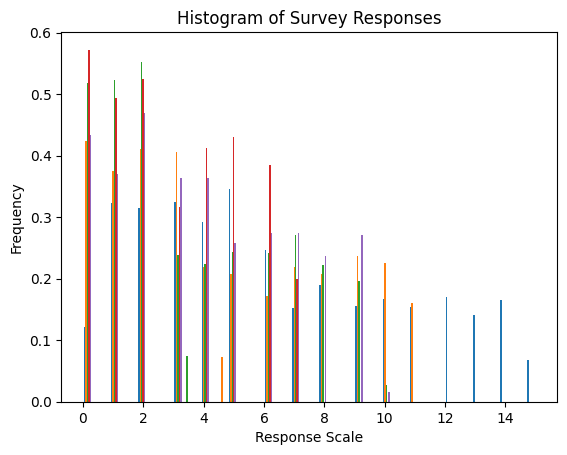

In [2]:
import matplotlib.pyplot as plt
columns = ra_df[
    ["Friends_circle_size", "Time_spent_Alone", "Post_frequency", "Going_outside", "Social_event_attendance"]
]
plt.hist(columns, bins=50, density=True)
plt.title("Histogram of Survey Responses")
plt.xlabel("Response Scale")
plt.ylabel("Frequency")

plt.show()

In [3]:
from IPython.display import display_html

def display_side_by_side(*args):
    html_str = ''
    for df in args:
        html_str += df.to_html()
    display_html(
        html_str.replace('table','table style="display:inline"'), 
        raw=True
    )

In [4]:
import numpy as np
import pandas as pd

# See: https://ayoakin.medium.com/linear-regression-from-scratch-using-matrices-991df6e28f62

X = ra_df[["Time_spent_Alone", "Post_frequency", "Going_outside", "Social_event_attendance"]].copy()
X["Going_outside:Social_event_attendance"] = ra_df["Going_outside"] * ra_df["Social_event_attendance"]
y = np.log(ra_df[["Friends_circle_size"]].copy() + 1)

# Append column of 1s
X["Intercept"] = 1

# Transpose
X_T = X.T

# Calculate beta 1 using matrix form
B = np.linalg.inv(X_T @ X) @ (X_T @ y)

B.index = X.columns

# Compute predictions of y-hat using beta 1
predictions = X @ B

# Calculate Sum of Squares
SSR = ((y - predictions) ** 2).sum()
# Calculate Sum of Squares total
SST = ((y - y.mean()) ** 2).sum()
# Calculate R^2
R2 = 1 - (SSR / SST)

residuals = y - predictions

print("\nR-Squared: {}".format(R2.iloc[0]))
display_side_by_side(B, residuals.head())


R-Squared: 0.596632269105434


,Friends_circle_size
Time_spent_Alone,-0.042896
Post_frequency,0.037340
Going_outside,0.094299
Social_event_attendance,0.083253
Going_outside:Social_event_attendance,-0.005735
Intercept,1.316891
,Friends_circle_size
0,0.545889
1,-1.042845
2,0.525873


In [5]:
from statsmodels.formula.api import ols

# Check results using statsmodels
model = ols(
    formula='Friends_circle_size ~ Time_spent_Alone + Post_frequency + Drained_after_socializing + Going_outside*Social_event_attendance',
    data=ra_df
).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     Friends_circle_size   R-squared:                       0.662
Model:                             OLS   Adj. R-squared:                  0.661
Method:                  Least Squares   F-statistic:                     944.0
Date:                 Wed, 09 Jul 2025   Prob (F-statistic):               0.00
Time:                         09:19:12   Log-Likelihood:                -6725.9
No. Observations:                 2900   AIC:                         1.347e+04
Df Residuals:                     2893   BIC:                         1.351e+04
Df Model:                            6                                         
Covariance Type:             nonrobust                                         
=========================================================================================================
                                            coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
Intercept                                 7.3885      0.333     22.183      0.000       6.735       8.042
Time_spent_Alone                         -0.0974      0.024     -4.017      0.000      -0.145      -0.050
Post_frequency                            0.0644      0.029      2.249      0.025       0.008       0.120
Drained_after_socializing                -4.3806      0.263    -16.660      0.000      -4.896      -3.865
Going_outside                             0.1249      0.064      1.956      0.051      -0.000       0.250
Social_event_attendance                   0.1724      0.050      3.438      0.001       0.074       0.271
Going_outside:Social_event_attendance     0.0095      0.011      0.847      0.397      -0.012       0.031
==============================================================================
Omnibus:                       50.414   Durbin-Watson:                   1.885
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               30.170
Skew:                           0.077   Prob(JB):                     2.81e-07
Kurtosis:                       2.525   Cond. No.                         217.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Plot regression model

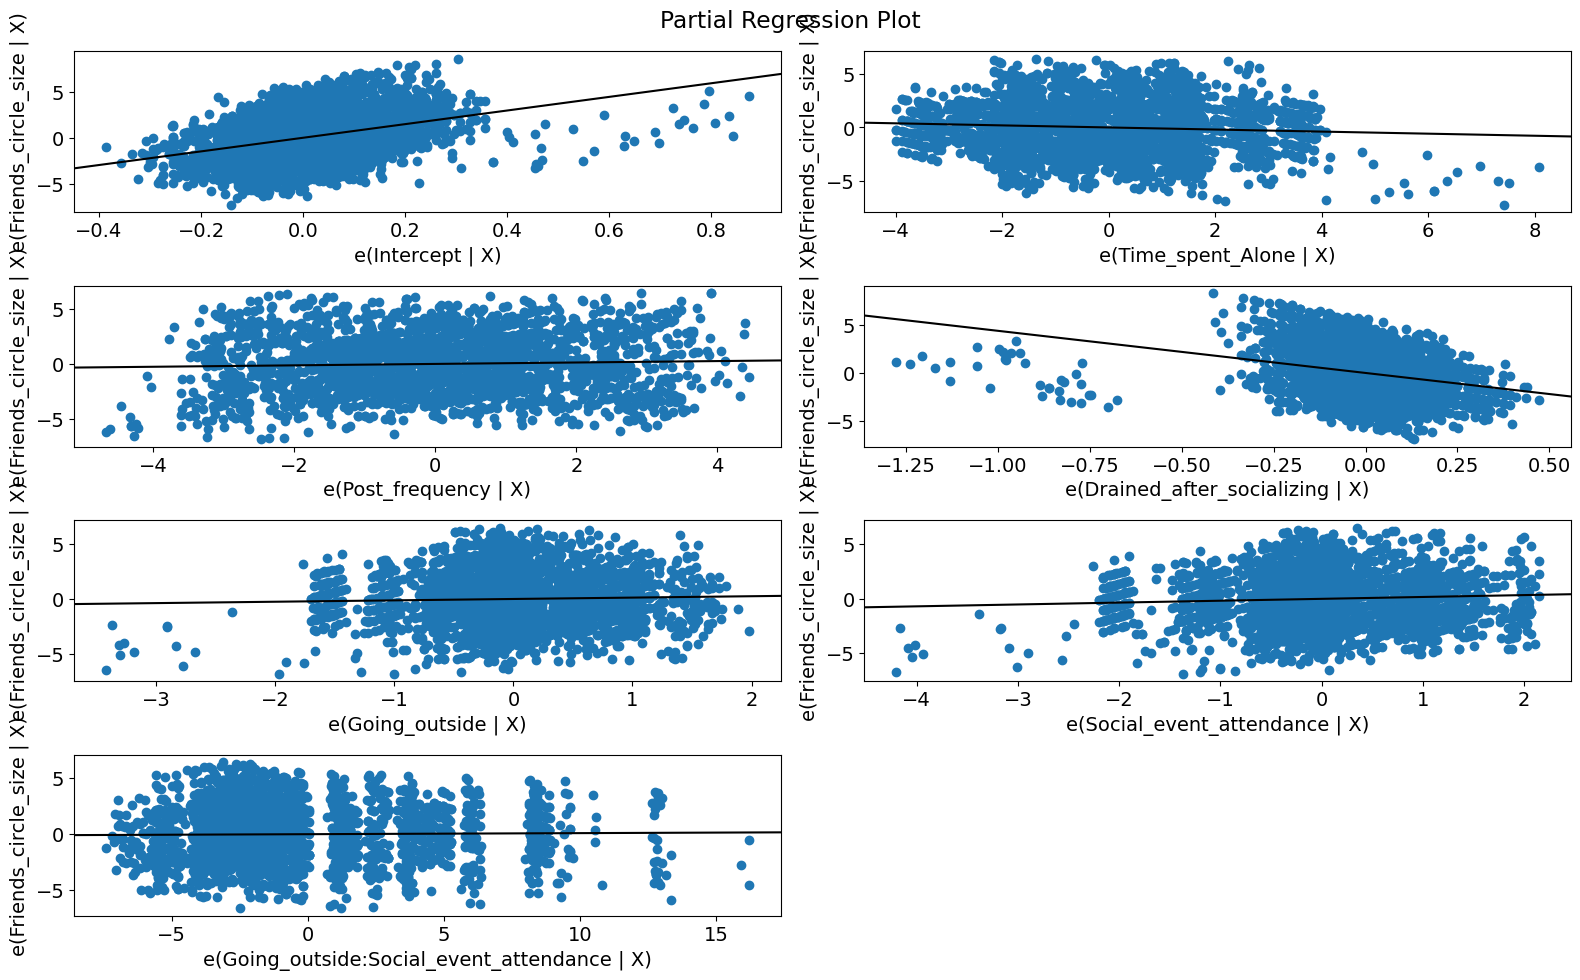

In [6]:
import statsmodels.api as sm
import matplotlib.pyplot as plt

plt.rc("figure", figsize=(16, 10))
plt.rc("font", size=14)

fig = sm.graphics.plot_partregress_grid(model)
fig.tight_layout(pad=1.0)

### Determine Fitness of Residuals

Residual standard error: 0.44397244799257635


/Users/prokope/KState/STAT-705/Project/.venv/lib/python3.12/site-packages/numpy/_core/fromnumeric.py:4062: FutureWarning: The behavior of DataFrame.std with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return std(axis=axis, dtype=dtype, out=out, ddof=ddof, **kwargs)


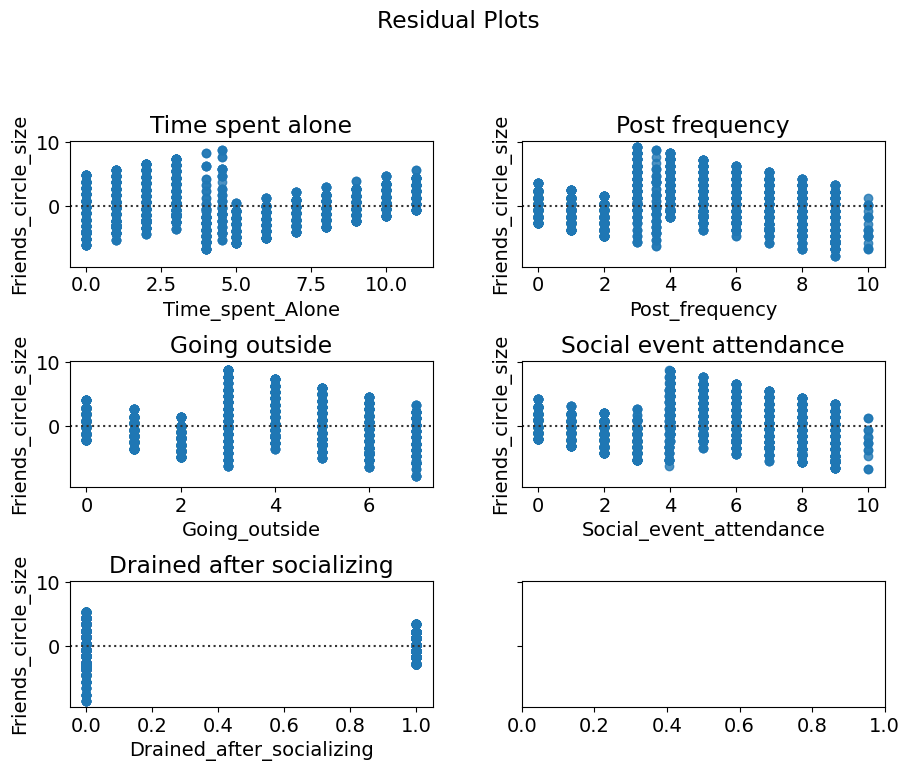

In [7]:
import numpy as np
import seaborn as sns

fig, axes = plt.subplots(3, 2, figsize=(10, 8), sharey=True)
fig.suptitle("Residual Plots")
fig.tight_layout(pad=3.0)

plots_info = [
    {
        "name": "Time_spent_Alone",
        "title": "Time spent alone",
        "axes": (0, 0)
    },
    {
        "name": "Post_frequency",
        "title": "Post frequency",
        "axes": (0, 1)
    },
    {
        "name": "Going_outside",
        "title": "Going outside",
        "axes": (1, 0)
    },
    {
        "name": "Social_event_attendance",
        "title": "Social event attendance",
        "axes": (1, 1)
    },
    {
        "name": "Drained_after_socializing",
        "title": "Drained after socializing",
        "axes": (2, 0)
    },
]

print("Residual standard error: {}".format(np.std(residuals).iloc[0]))

for plot in plots_info:
    y_axis = plot["axes"][0]
    x_axis = plot["axes"][1]
    position = axes[y_axis, x_axis]
    sns.residplot(ra_df, x=plot["name"], y="Friends_circle_size", ax=position)
    position.set_title(plot["title"])


## Prediction

In [8]:

time_alone = B.iloc[0]
post_freq = B.iloc[1]
outside = B.iloc[2]
events = B.iloc[3]
outside_events = B.iloc[4]

y = time_alone*0.0 + post_freq*4.0 + events*4.0
y

Friends_circle_size    0.48237
dtype: float64